### 1. Exploratory Data Analysis

#### Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64


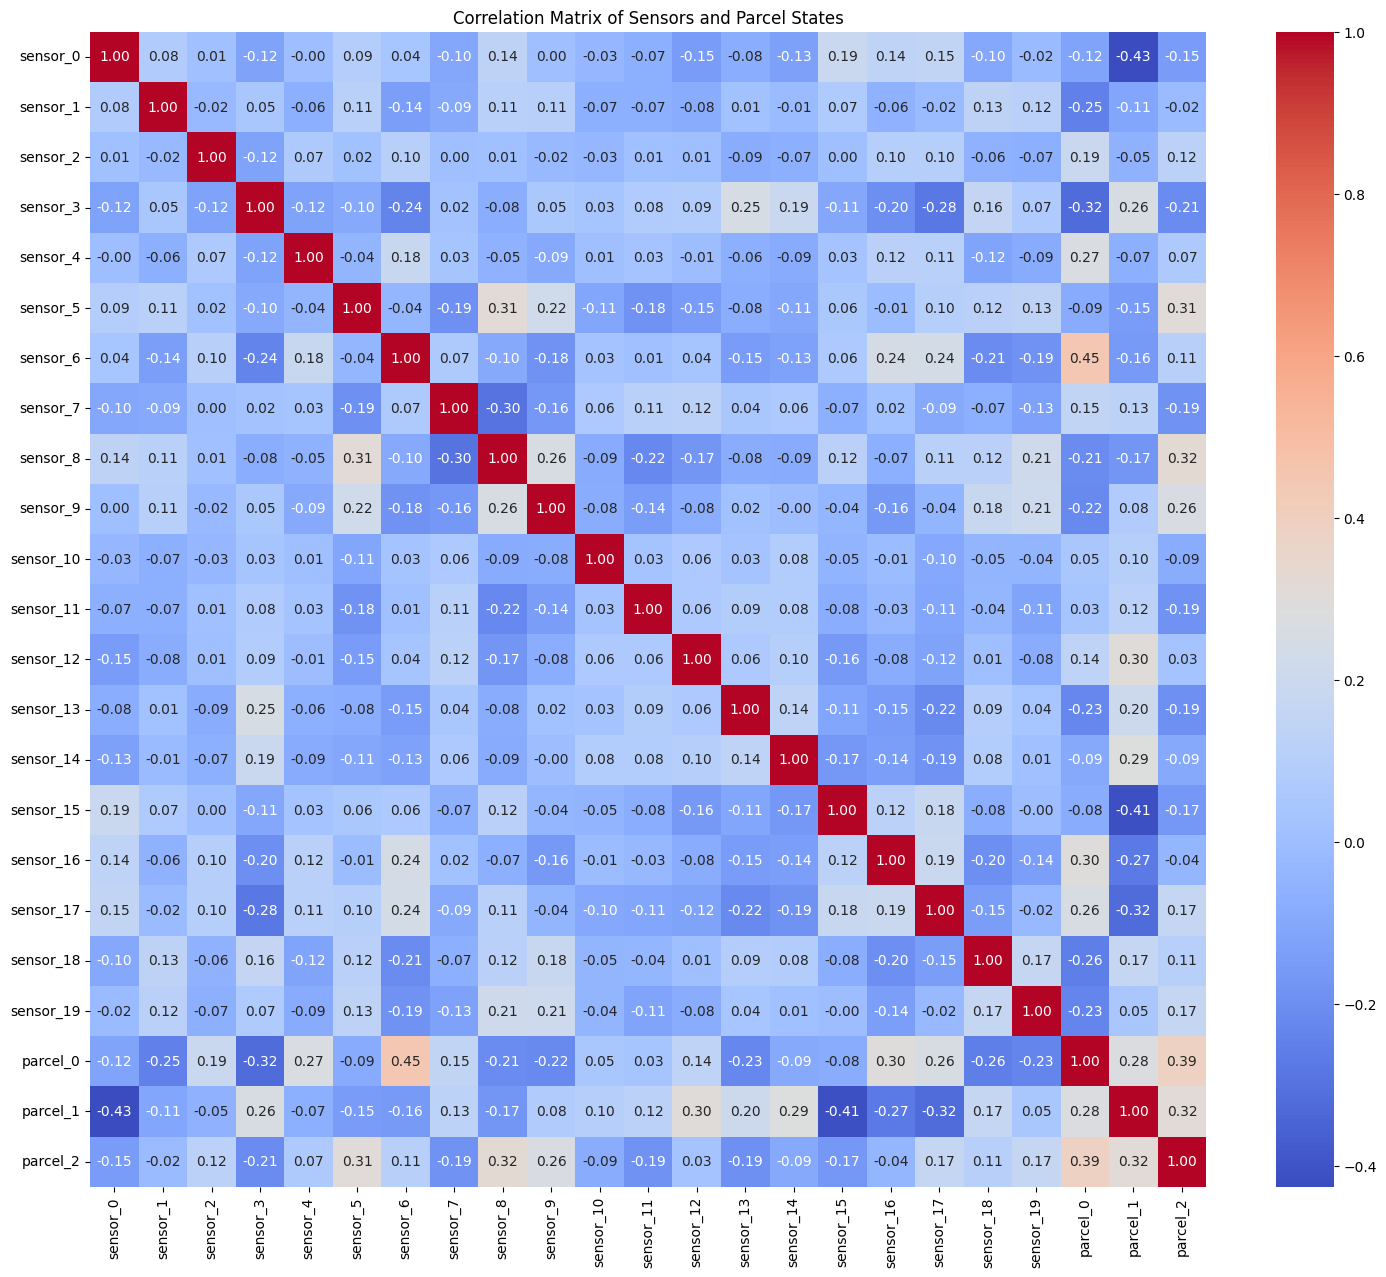


#### Sensor Data Distributions


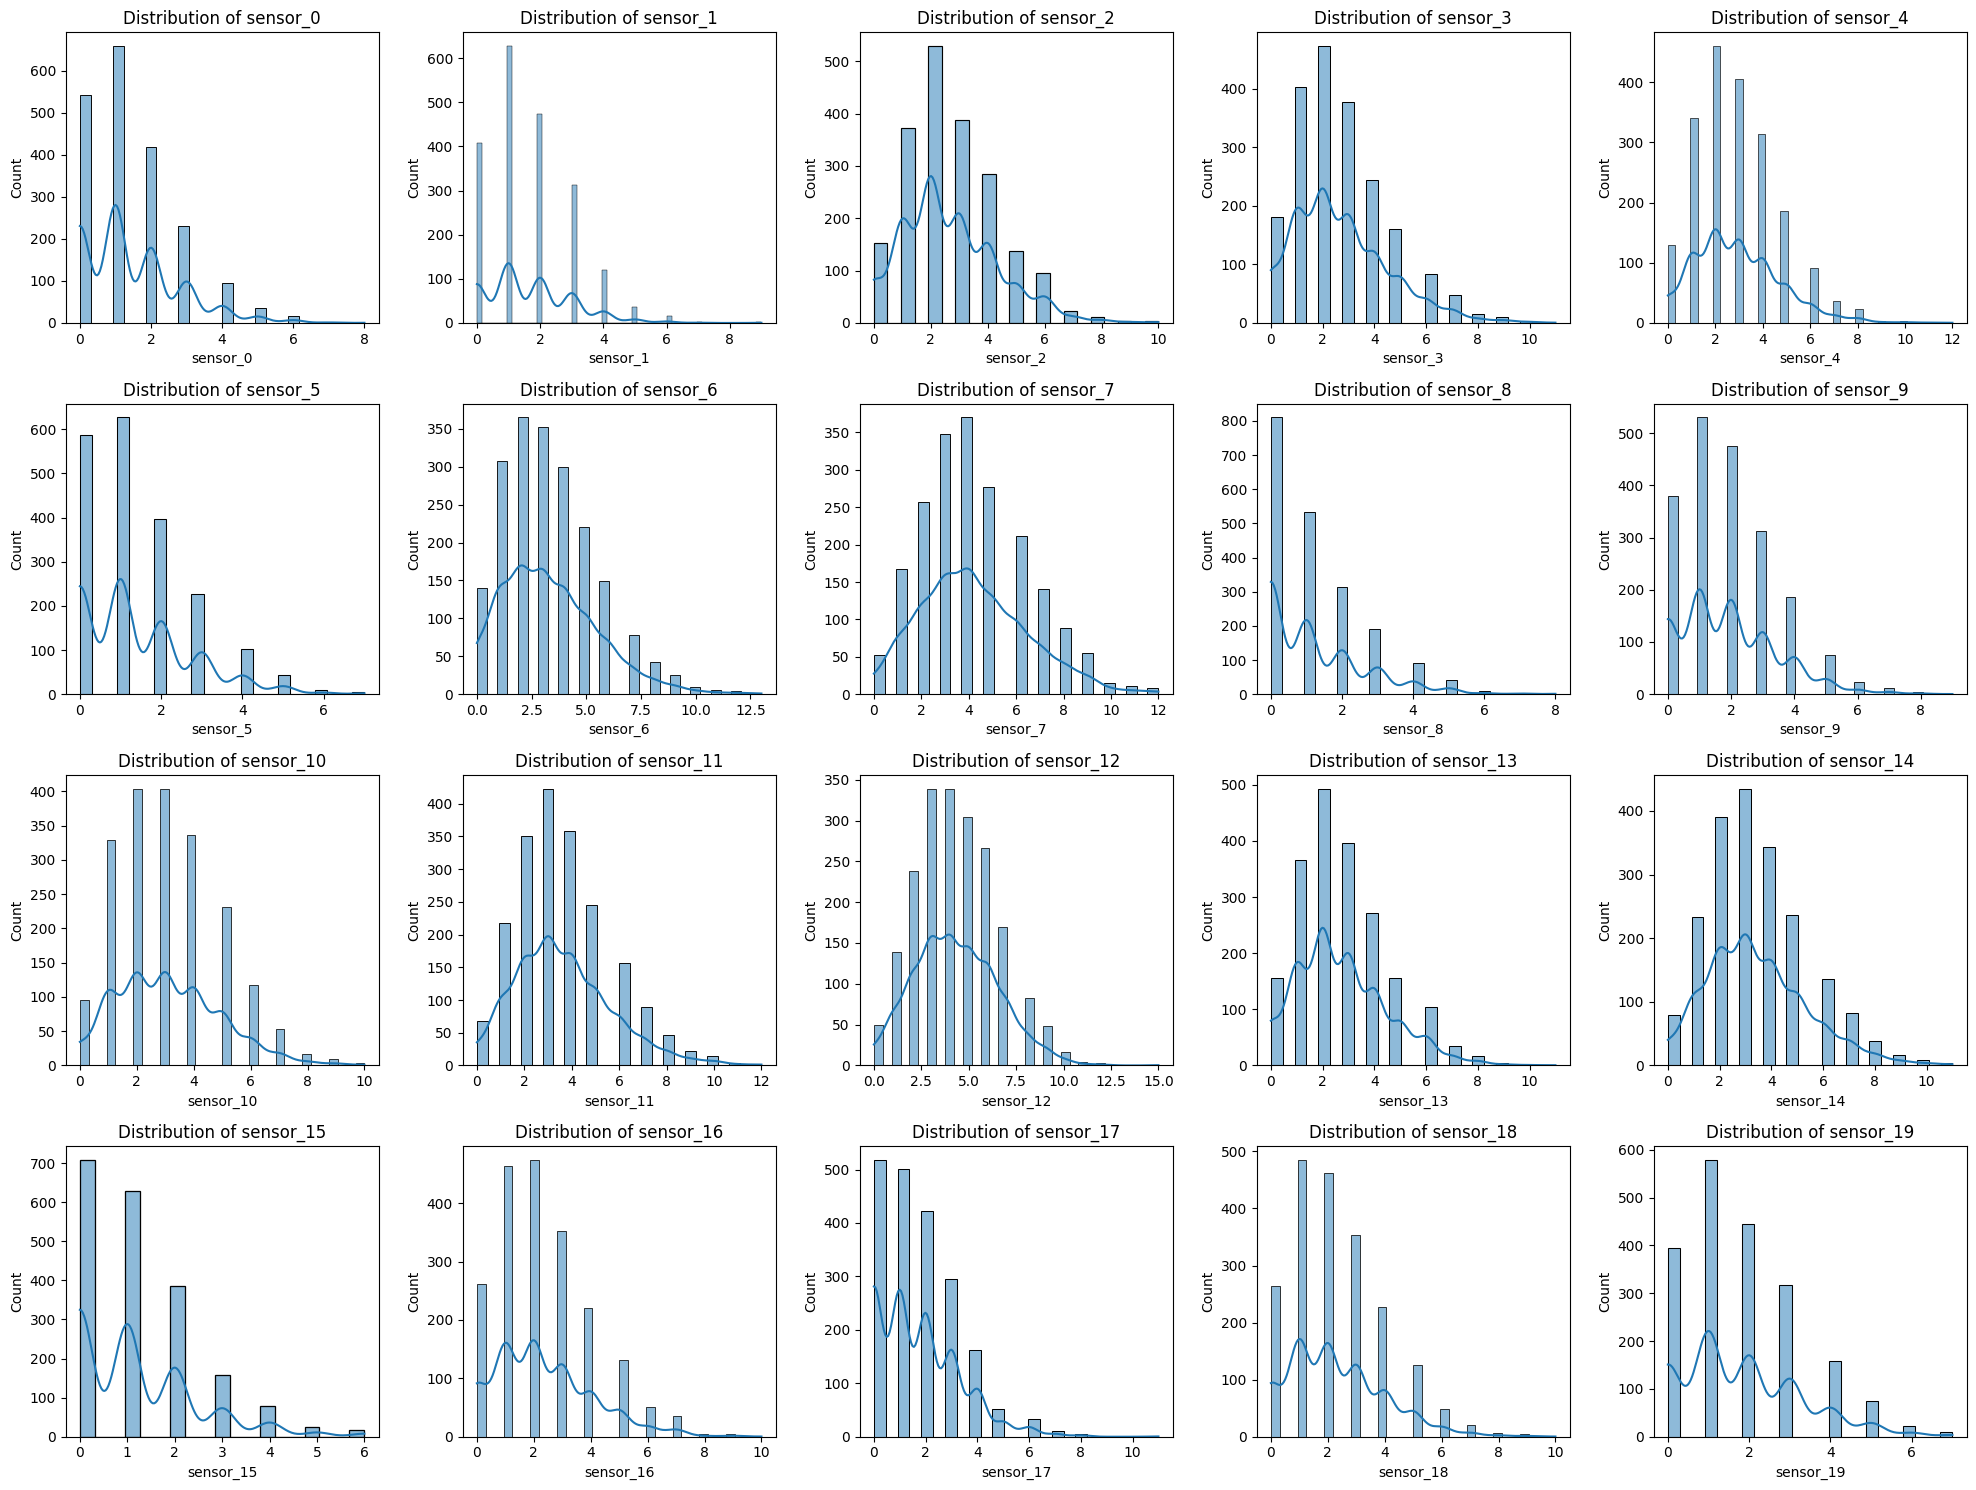


#### Parcel Activation Counts
parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64

### 2. Model Training and Evaluation

#### Overall Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647


#### Evaluation Metrics per Parcel:

##### parcel_0 Metrics:
              precision    recall  f1-score   support

         OFF       0.86      0.75      0.80       144
          ON       0.87      0.93      0.90       256

    accuracy                           0.87       400
   macro avg       0.87      0.84      0.85       400
weighted avg       0.87      0.87      0.87       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


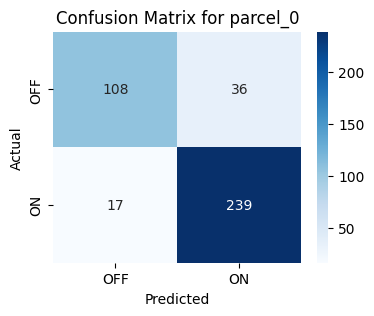

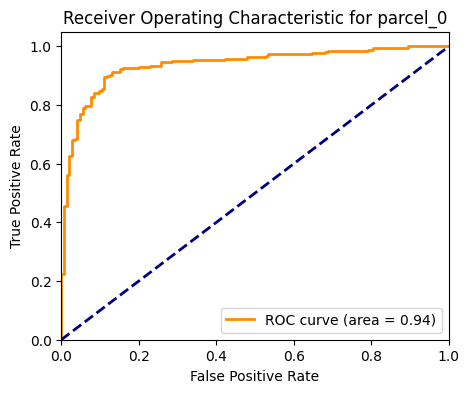

ROC AUC for parcel_0: 0.94

##### parcel_1 Metrics:
              precision    recall  f1-score   support

         OFF       0.89      0.70      0.78        96
          ON       0.91      0.97      0.94       304

    accuracy                           0.91       400
   macro avg       0.90      0.84      0.86       400
weighted avg       0.91      0.91      0.90       400



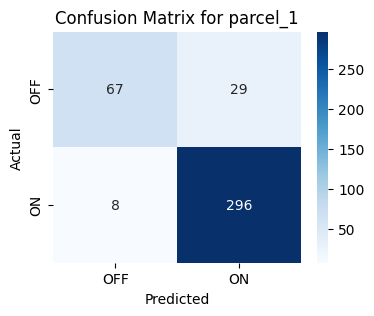

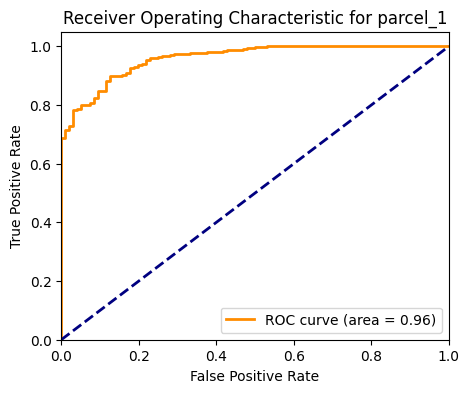

ROC AUC for parcel_1: 0.96

##### parcel_2 Metrics:
              precision    recall  f1-score   support

         OFF       0.87      0.99      0.93       313
          ON       0.93      0.48      0.64        87

    accuracy                           0.88       400
   macro avg       0.90      0.74      0.78       400
weighted avg       0.89      0.88      0.86       400



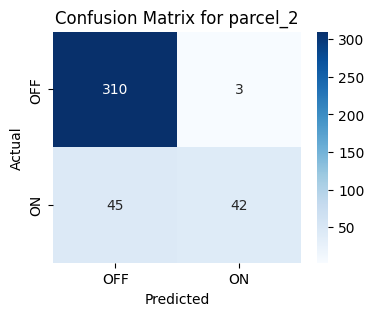

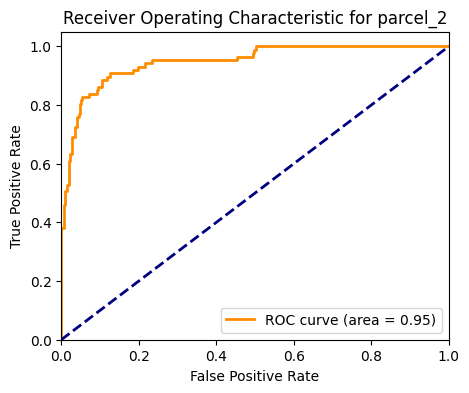

ROC AUC for parcel_2: 0.95

#### Feature Importance from Random Forest:


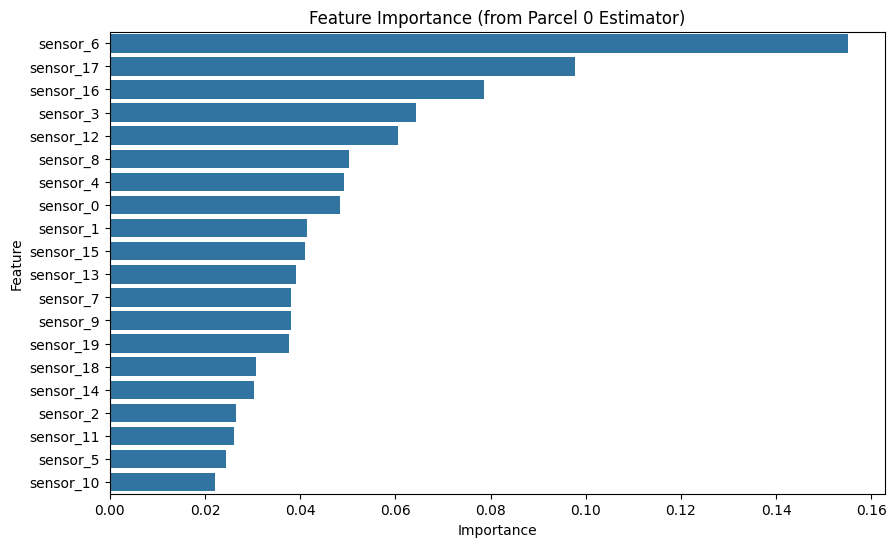


#### Cross-Validation Performance (for Parcel 0):
F1-weighted scores for Parcel 0 (5-fold CV): [0.88364646 0.88487151 0.86650158 0.86230189 0.88291055]
Mean F1-weighted score for Parcel 0: 0.88 (Std: 0.01)

#### Sprinkler Activity: Individual Parcel Conditions


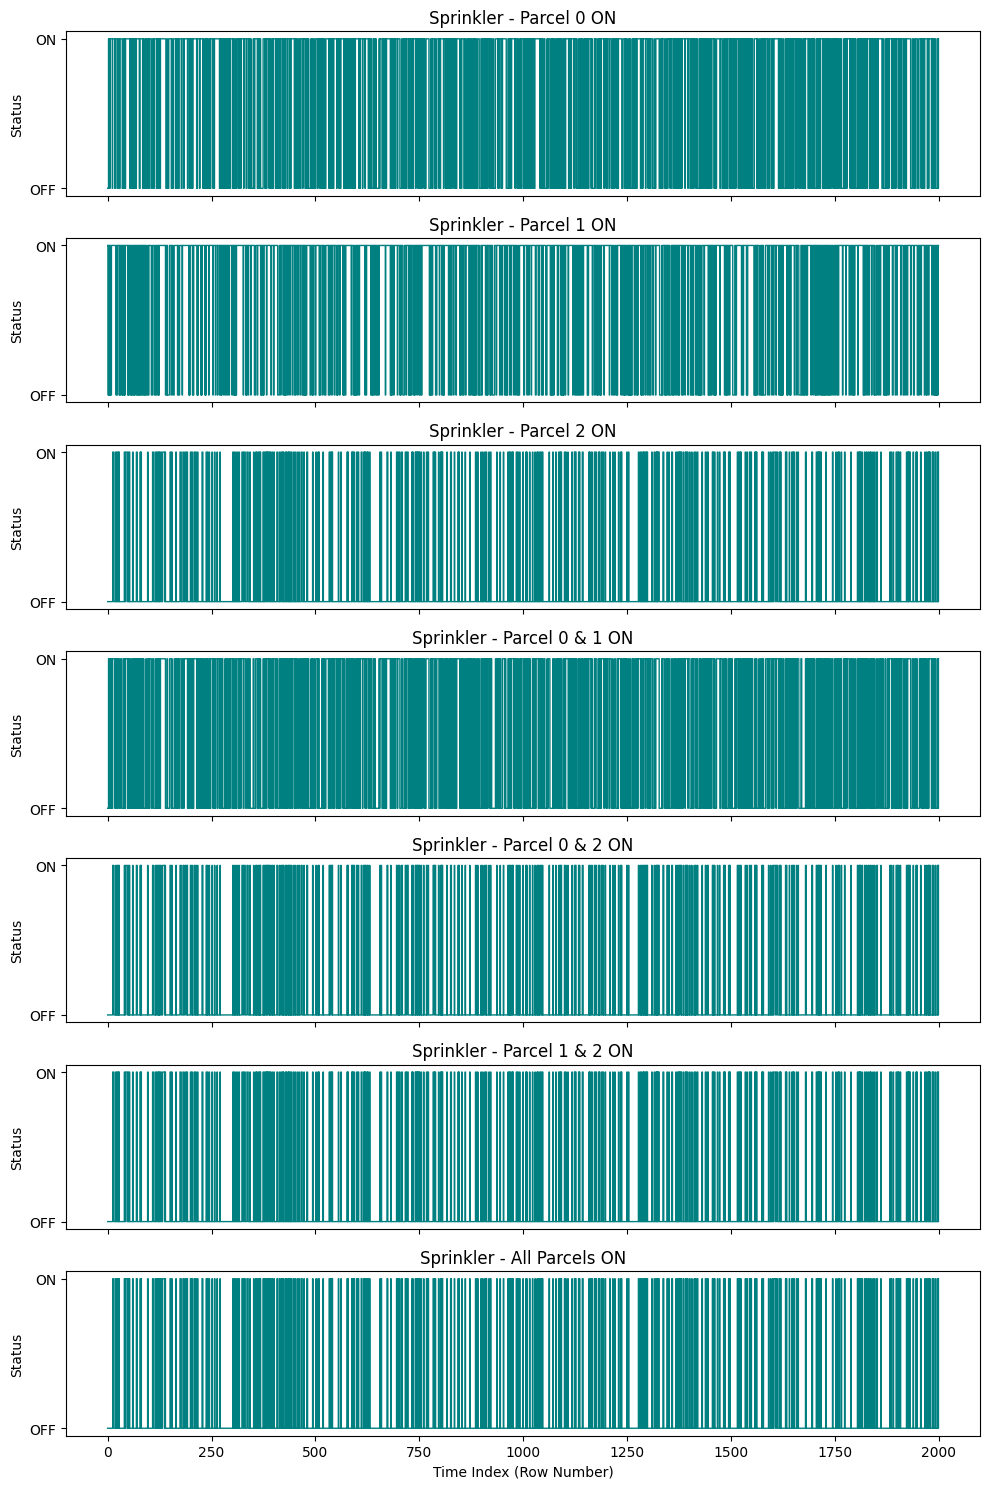


#### Pump Activity and Combined Farm Coverage (Actual)


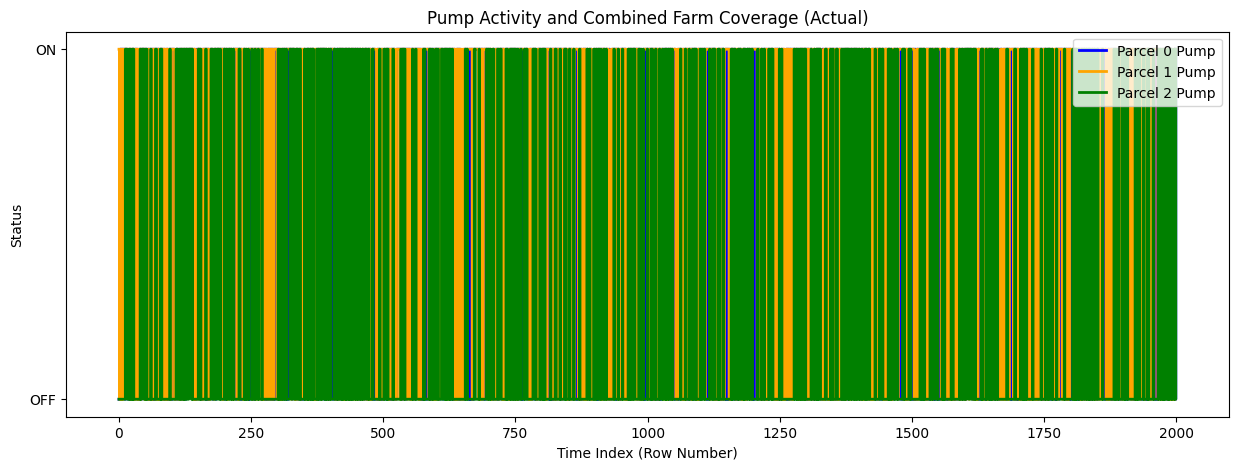


### 3. Sample Predictions vs. Actuals


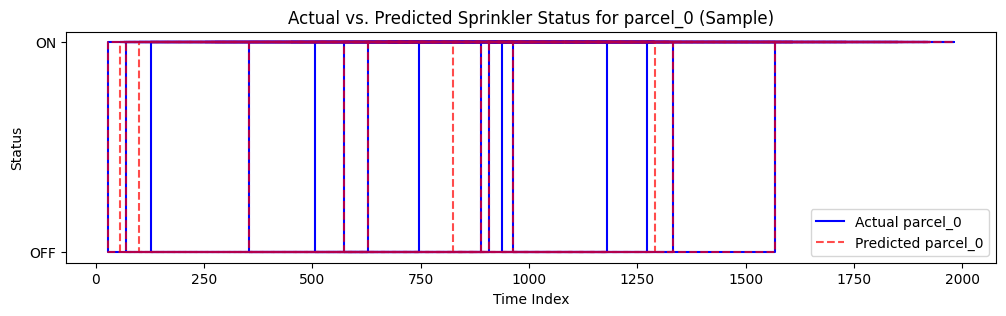

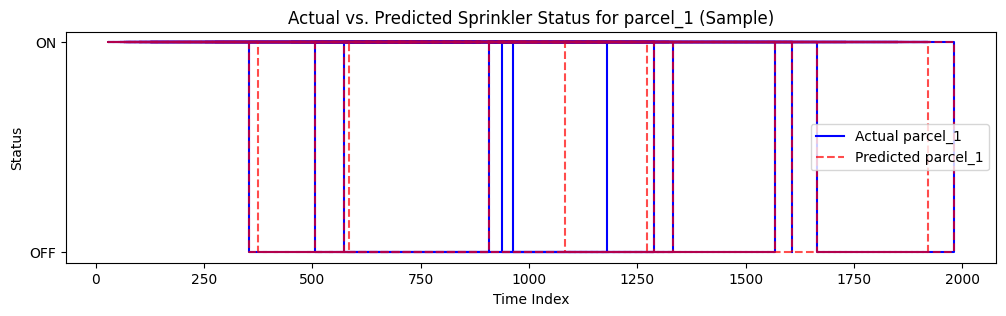

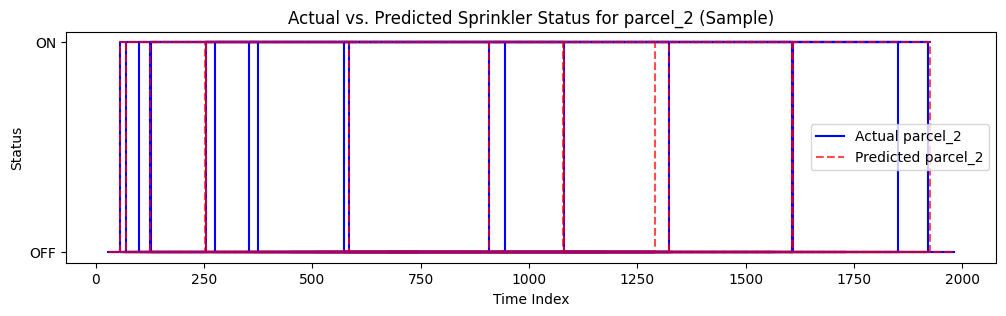


Model and Scaler saved successfully.


In [5]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np # Import numpy as it's used in some new evaluation steps

# -------------------------------
# STEP 1: LOAD AND PREPROCESS DATA
# -------------------------------

# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")

# Drop 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# --- NEW: Exploratory Data Analysis (EDA) ---
print("### 1. Exploratory Data Analysis")

print("\n#### Dataset Info:")
df.info()

print("\n#### Descriptive Statistics:")
print(df.describe())

# Correlation Heatmap
print("\n#### Correlation Heatmap (Sensors and Parcels)")
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Sensors and Parcel States")
plt.show()

# Distribution of Sensor Data (Example for all sensor columns)
print("\n#### Sensor Data Distributions")
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(df.columns[:20]): # Only sensor columns
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Label Imbalance Check
print("\n#### Parcel Activation Counts")
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())


# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------

X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)
y = df.iloc[:, 20:]    # parcel_0, parcel_1, parcel_2


# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# -------------------------------
# STEP 3: TRAIN-TEST SPLIT
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n### 2. Model Training and Evaluation")

# --- NEW: Hyperparameter Tuning (Optional but recommended) ---
# This can take a long time to run, and might hit Colab's memory/CPU limits for very large grids.
# For demonstration in internship, even a small grid or just mentioning it is impactful.
# If you decide to run this, you might comment out the fixed hyperparameters below and use the best_rf_estimator.

# rf_param_grid = {
#     'n_estimators': [100, 200, 300], # Fewer estimators for quicker test
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }
# # Using a smaller cv (e.g., 3) for faster execution in Colab
# rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                               param_grid=rf_param_grid,
#                               cv=3,
#                               scoring='f1_weighted', # F1-score is good for multi-label/imbalanced
#                               n_jobs=-1, # Use all available cores
#                               verbose=1)

# # Wrap it with MultiOutputClassifier (if using GridSearchCV, pass rf_grid_search here)
# # For MultiOutputClassifier, GridSearchCV needs to be applied to the base estimator.
# # So, you'd train rf_grid_search first, then use its best_estimator_
# # model = MultiOutputClassifier(rf_grid_search) # Incorrect
# # Correct approach:
# # rf_grid_search.fit(X_train, y_train.iloc[:,0]) # Tune for one target, or iterate
# # best_rf_estimator = rf_grid_search.best_estimator_
# # model = MultiOutputClassifier(best_rf_estimator) # Then train this model

# For simplicity and keeping original code structure, we'll continue with fixed params for now:

# Define RandomForestClassifier with custom hyperparameters
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features='sqrt',      # Number of features to consider at each split ('auto', 'sqrt', 'log2', or int)
    random_state=42
)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(rf)

# Train the model
model.fit(X_train, y_train)

# -------------------------------
# STEP 5: EVALUATE MODEL
# -------------------------------

y_pred = model.predict(X_test)
# MultiOutputClassifier's predict_proba returns a list of arrays, one per target
y_pred_proba_list = model.predict_proba(X_test)


print("\n#### Overall Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))


# --- NEW: Evaluation per Parcel (for deeper insights) ---
print("\n#### Evaluation Metrics per Parcel:")
for i, parcel_col in enumerate(y.columns):
    print(f"\n##### {parcel_col} Metrics:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], target_names=['OFF', 'ON']))

    # Confusion Matrix
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
    plt.title(f'Confusion Matrix for {parcel_col}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC AUC Curve
    # Ensure there are both classes for ROC AUC and predict_proba for this specific target
    if len(np.unique(y_test.iloc[:, i])) > 1:
        # Access the correct probability array for the current parcel
        fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_pred_proba_list[i][:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {parcel_col}')
        plt.legend(loc="lower right")
        plt.show()
        print(f"ROC AUC for {parcel_col}: {roc_auc:.2f}")
    else:
        print(f"Cannot plot ROC AUC for {parcel_col} as only one class is present in test data for this parcel.")

# --- NEW: Feature Importance ---
print("\n#### Feature Importance from Random Forest:")
# RandomForestClassifier in MultiOutputClassifier has an 'estimators_' attribute
# which is a list of the individual estimators (one for each output).
# We can take the feature importance from the first estimator as a representative.
# For more robustness, you could average importances across all estimators.
if hasattr(model.estimators_[0], 'feature_importances_'):
    feature_importances = model.estimators_[0].feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance (from Parcel 0 Estimator)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Feature importances not available for the base estimator.")


# --- NEW: Cross-Validation (Example for a single target) ---
print("\n#### Cross-Validation Performance (for Parcel 0):")
# Use cross_val_score on the base estimator for one target
# Note: For MultiOutputClassifier, cross-validation on the full model with multi-label scoring
# is more complex and might require custom scoring functions or iterating over targets.
# Here, we demonstrate for a single parcel for simplicity.
if hasattr(model.estimators_[0], 'fit'): # Check if it's an estimatable object
    cv_scores = cross_val_score(model.estimators_[0], X_scaled, y.iloc[:, 0], cv=5, scoring='f1_weighted', n_jobs=-1)
    print(f"F1-weighted scores for Parcel 0 (5-fold CV): {cv_scores}")
    print(f"Mean F1-weighted score for Parcel 0: {np.mean(cv_scores):.2f} (Std: {np.std(cv_scores):.2f})")
else:
    print("Base estimator not suitable for direct cross-validation or 'fit' method missing.")


# Original step plots
print("\n#### Sprinkler Activity: Individual Parcel Conditions")
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])

axs[-1].set_xlabel("Time Index (Row Number)")
plt.tight_layout()
plt.show()


print("\n#### Pump Activity and Combined Farm Coverage (Actual)")
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

plt.title("Pump Activity and Combined Farm Coverage (Actual)")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


# --- NEW: Visualize Sample Predictions vs Actuals ---
print("\n### 3. Sample Predictions vs. Actuals")
# Select a small slice of test data for visualization
sample_indices = y_test.head(50).index # Get first 50 indices from test set
y_test_sample = y_test.loc[sample_indices]
y_pred_sample = pd.DataFrame(y_pred[:50], columns=y.columns, index=sample_indices) # Use y_pred directly

for i, parcel_col in enumerate(y.columns):
    plt.figure(figsize=(12, 3))
    plt.step(y_test_sample.index, y_test_sample[parcel_col], where='post', label=f'Actual {parcel_col}', color='blue')
    plt.step(y_pred_sample.index, y_pred_sample[parcel_col], where='post', linestyle='--', label=f'Predicted {parcel_col}', color='red', alpha=0.7)
    plt.title(f'Actual vs. Predicted Sprinkler Status for {parcel_col} (Sample)')
    plt.xlabel('Time Index')
    plt.ylabel('Status')
    plt.yticks([0, 1], ['OFF', 'ON'])
    plt.legend()
    plt.show()


# -------------------------------
# STEP 6: SAVE MODEL AND SCALER
# -------------------------------\n",
# Save the trained model
joblib.dump(model, "Farm_Irrigation_System.pkl")
# Save the scaler as well, it's crucial for preprocessing new inference data
joblib.dump(scaler, "MinMaxScaler.pkl")
print("\nModel and Scaler saved successfully.")